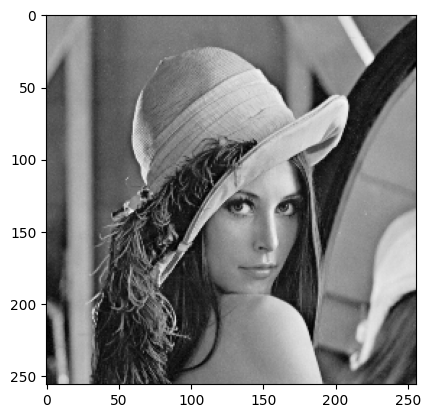

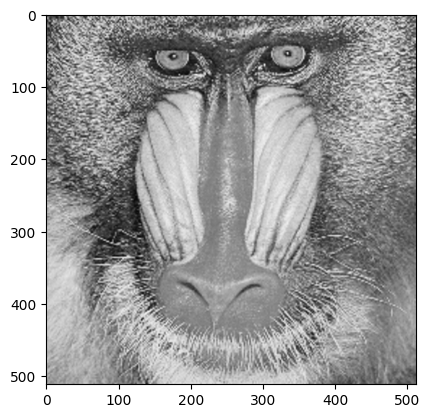

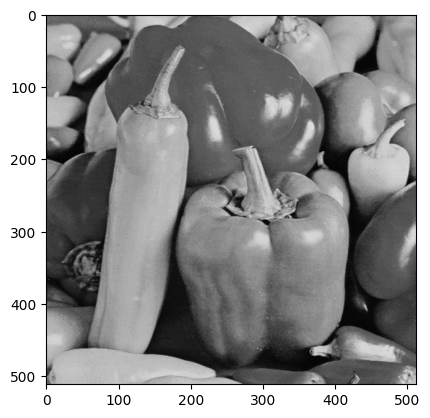

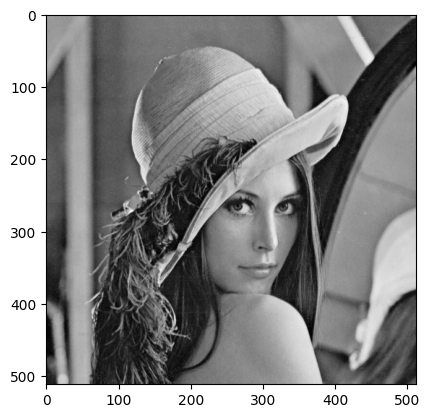

In [27]:
from matplotlib import pyplot as plt
from glob import glob
from PIL import Image, ImageOps

from PIL import TiffImagePlugin
TiffImagePlugin.DEBUG = True
import numpy as np
from scipy import signal

image_pths = glob("standard_test_images/*gray*.png")

for pth in image_pths:
    plt.figure()
    img = Image.open(pth)
    plt.imshow(img, cmap="gray")

In [46]:
%pip install opencv-python

  Obtaining dependency information for opencv-python from https://files.pythonhosted.org/packages/77/df/b56175c3fb5bc058774bdcf35f5a71cf9c3c5b909f98a1c688eb71cd3b1f/opencv_python-4.9.0.80-cp37-abi3-macosx_11_0_arm64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.4/35.4 MB 3.2 MB/s eta 0:00:0000:0100:01

[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


(256, 256)
(256, 256)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)


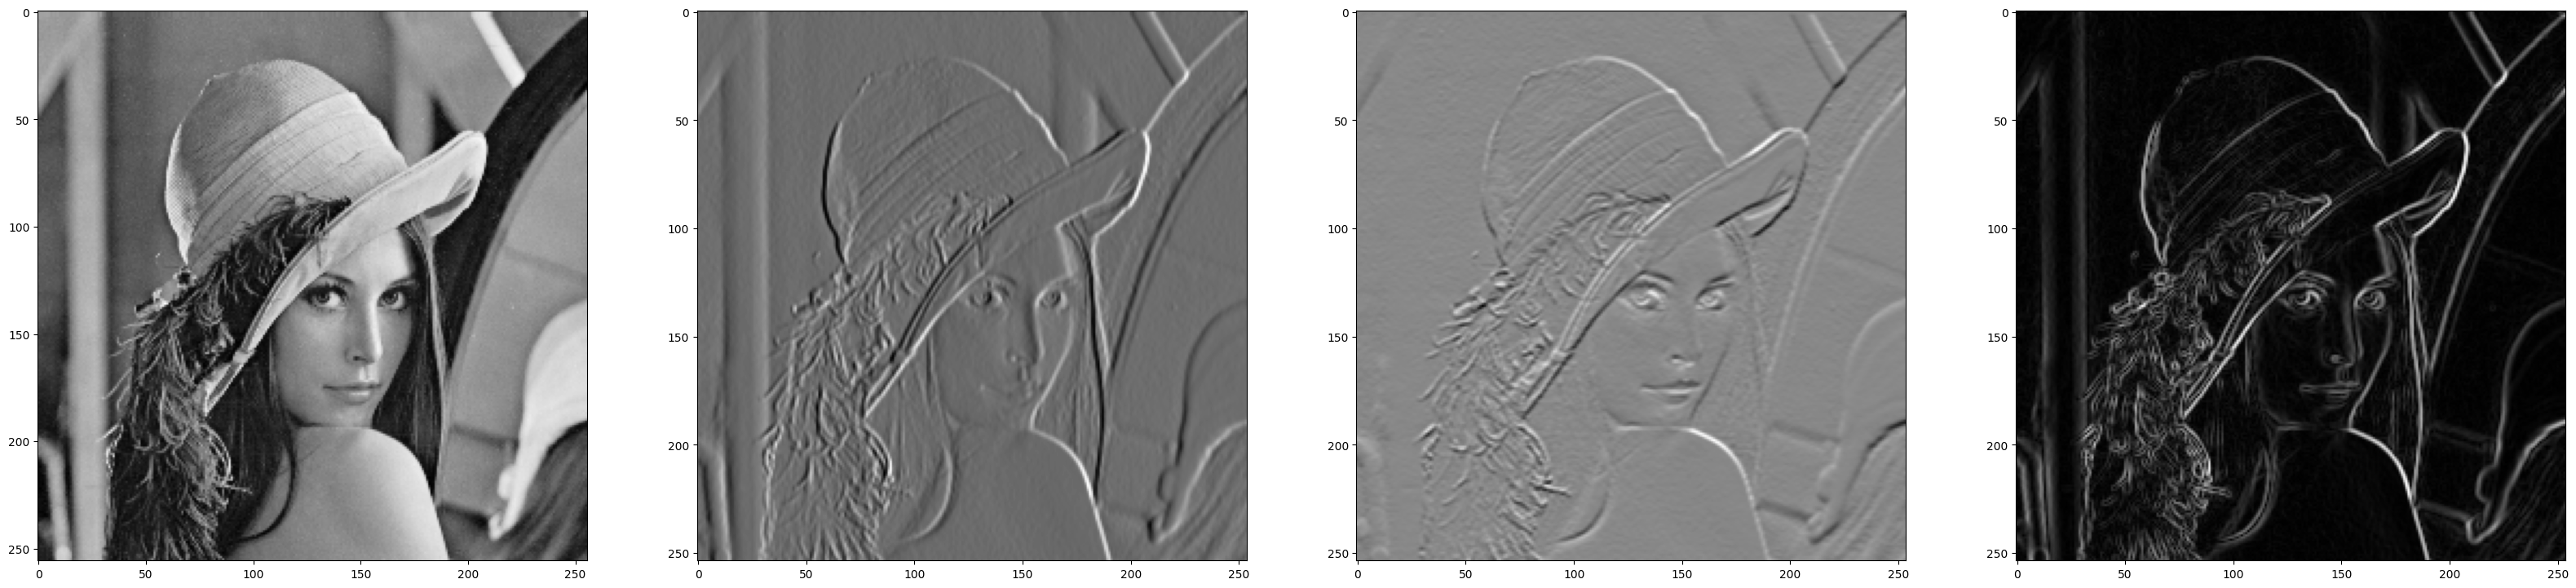

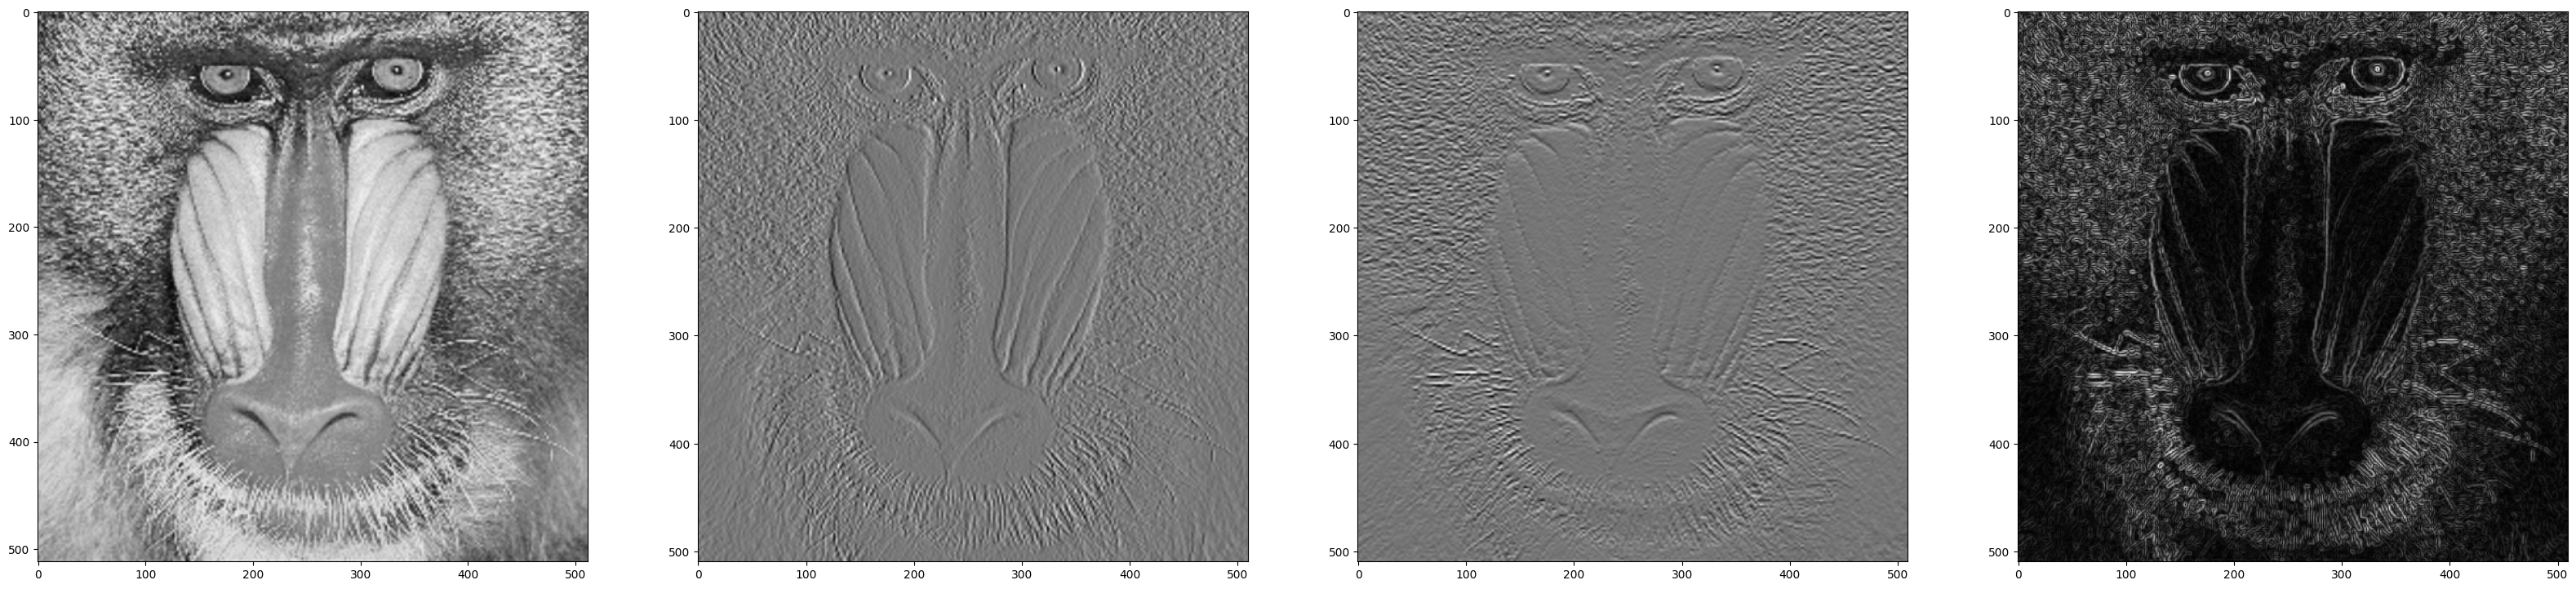

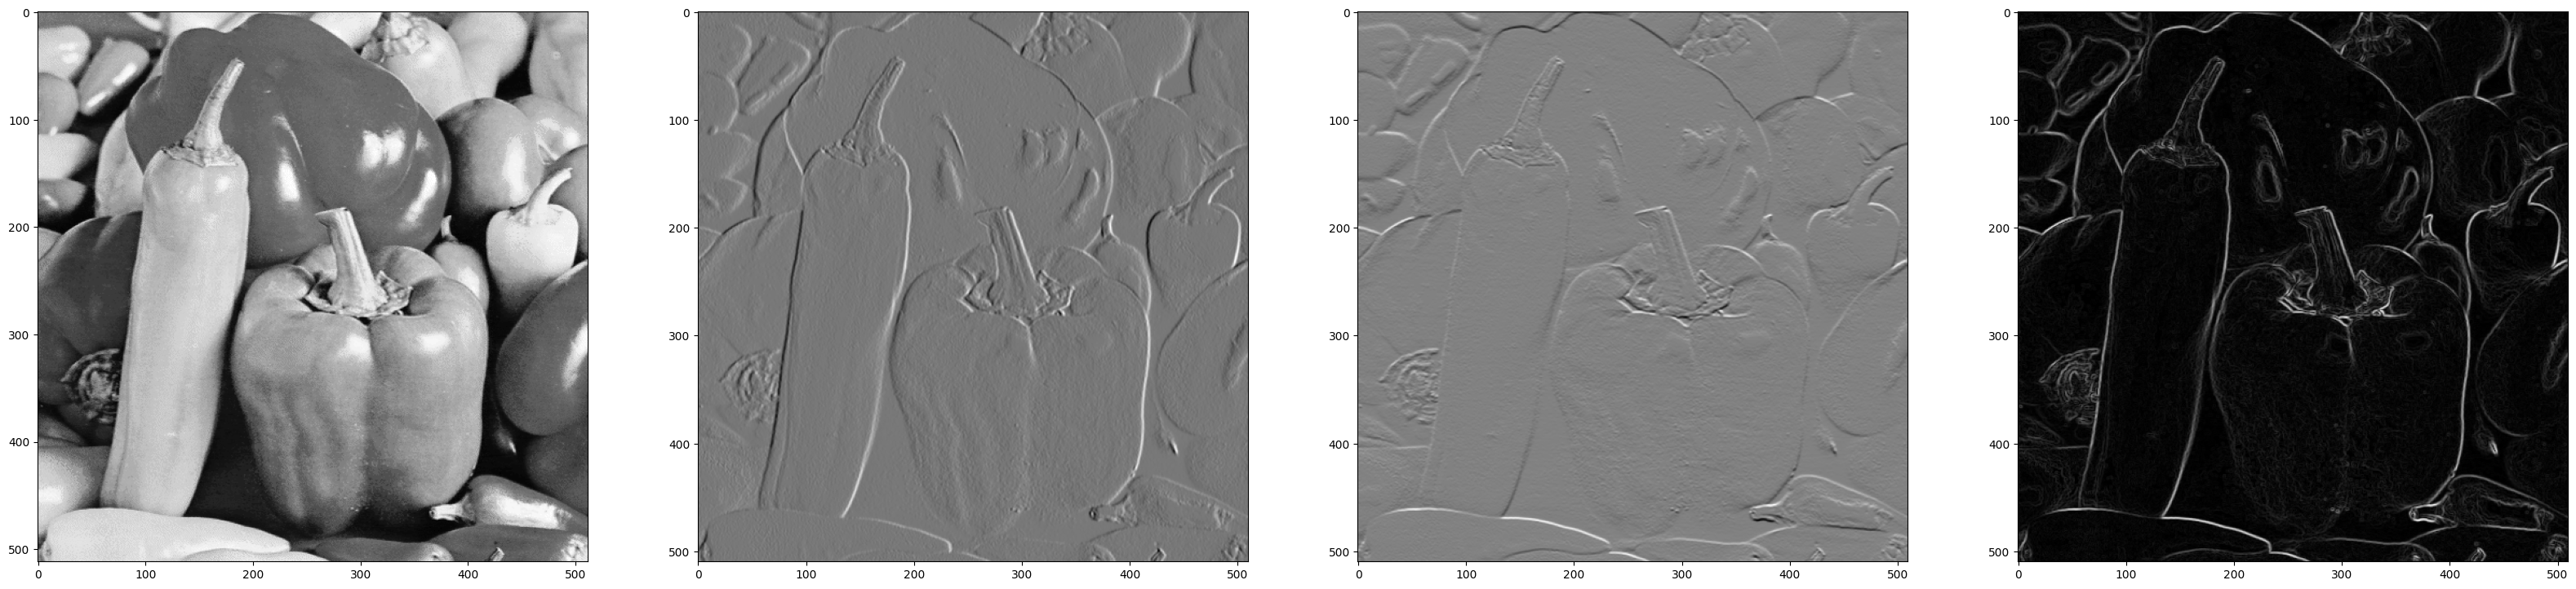

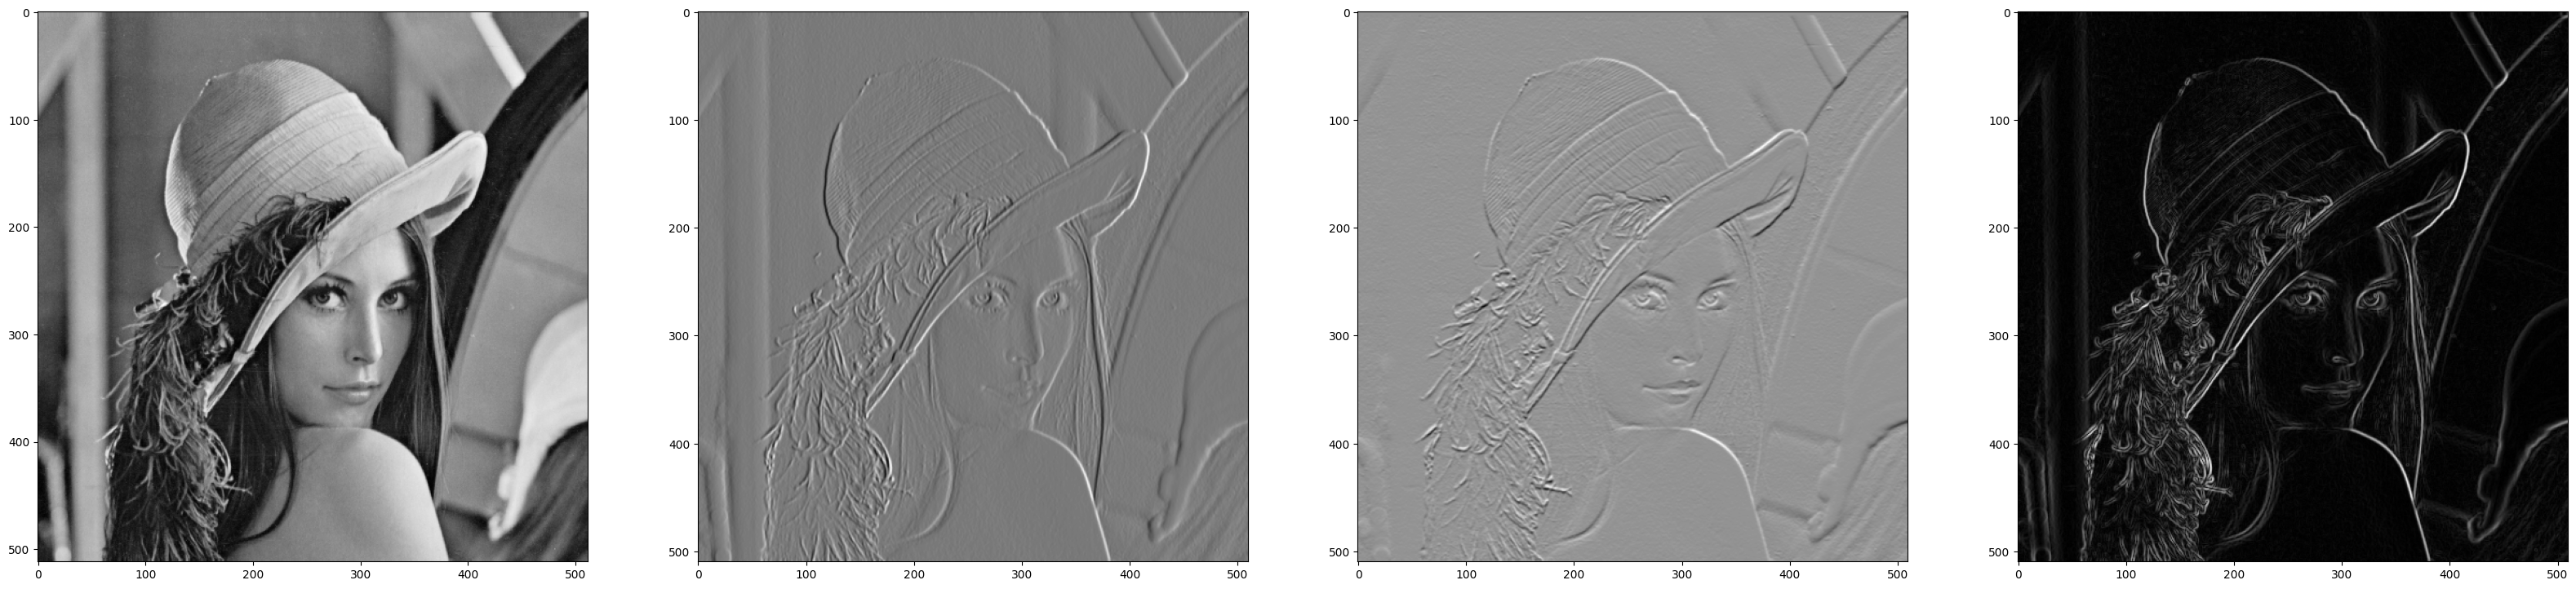

In [55]:


for pth in image_pths:
    plt.figure(figsize=(40, 10))
    img = Image.open(pth)
    img = ImageOps.grayscale(img) 
    plt.subplot(1, 4, 1)
    plt.imshow(img, cmap="gray")
    print(np.array(img).shape)

    x_kernel = np.array([[-1, 0, 1],[-2, 0, 2],[-1, 0, 1]] )

    y_kernel = np.array([[1, 2, 1],[0, 0, 0],[-1, -2, -1]] )

    print(np.array(img).shape)

    x_edges = signal.convolve2d(np.array(img), x_kernel, mode="valid")
    y_edges = signal.convolve2d(np.array(img), y_kernel, mode="valid")

    edges = np.sqrt(x_edges**2 + y_edges**2)

    plt.subplot(1, 4, 2)
    plt.imshow(x_edges/np.max(x_edges), cmap=plt.cm.gray)
    # plt.colorbar()


    plt.subplot(1, 4, 3)
    plt.imshow(y_edges/np.max(y_edges), cmap=plt.cm.gray)
    # plt.colorbar()

    plt.subplot(1, 4, 4)
    plt.imshow(edges, cmap=plt.cm.gray)
    # plt.colorbar()
    

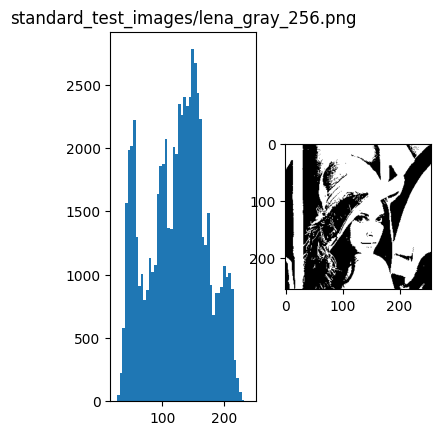

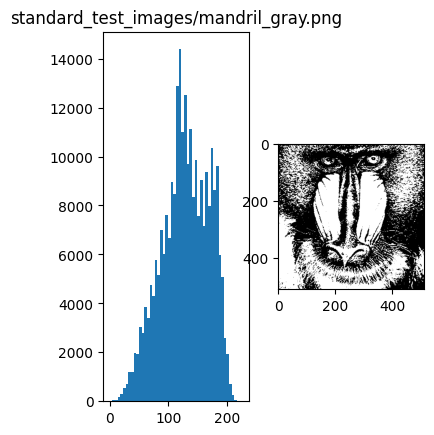

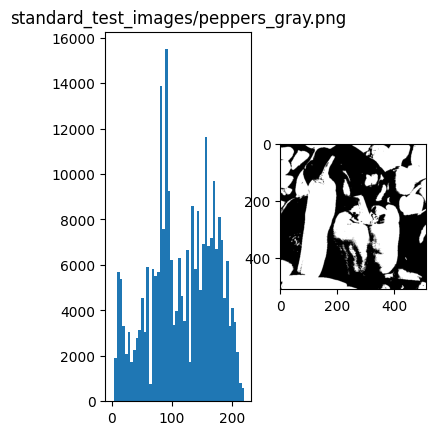

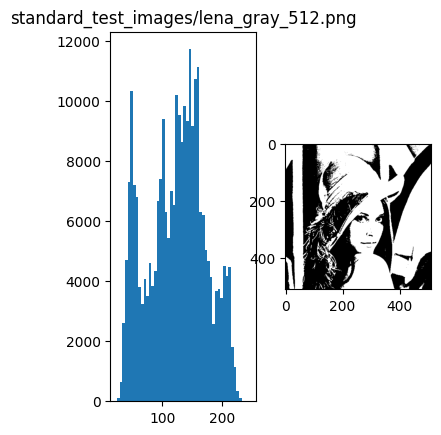

In [56]:
import cv2 as cv

for pth in image_pths:
    plt.figure()
    plt.subplot(1,3,1)
    img = Image.open(pth)
    img = ImageOps.grayscale(img) 
    img = np.array(img)

    plt.hist(img.flatten(), bins=50)
    plt.title(pth)

    ret2,th2 = cv.threshold(img,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
    plt.subplot(1,3,2)
    plt.imshow(th2, cmap="gray")

